In [1]:
import pandas as pd
import pymongo
from pymongo import MongoClient
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt

In [2]:
myclient = MongoClient("mongodb://localhost:27017/")

In [3]:
def read_mgdb_data(index_name="" ,client_name="forex_data", collection_name="closing_prices", set_index_on_date=True):
    if not index_name:
        print("Specify index name")
        return()
    
    mydb = myclient[client_name]
    mycol = mydb[collection_name]
    
    data_from_db = mycol.find_one({"index":index_name})
    df = pd.DataFrame(data_from_db['data'])
    if set_index_on_date:
        df = df.set_index("Date")
    return(df)

In [4]:
XAFMAD = read_mgdb_data("XAFMAD")
MGAMAD = read_mgdb_data("MGAMAD")
CHFMAD = read_mgdb_data("CHFMAD")
EURMAD = read_mgdb_data("EURMAD")
USDMAD = read_mgdb_data("USDMAD")
GBPMAD = read_mgdb_data("GBPMAD")
SEKMAD = read_mgdb_data("SEKMAD")

In [5]:
XAFMAD_ar = np.array(XAFMAD)
MGAMAD_ar = np.array(MGAMAD)
CHFMAD_ar = np.array(CHFMAD)
EURMAD_ar = np.array(EURMAD)
USDMAD_ar = np.array(USDMAD)
GBPMAD_ar = np.array(GBPMAD)
SEKMAD_ar = np.array(SEKMAD)

In [6]:
res_filiales = pd.read_csv(r"resultats_filiales.csv", index_col=0)

In [7]:
resultat_par_devise = res_filiales.groupby("Home_Currency").sum().drop("MAD", axis=0)

In [8]:
resultat_par_devise

,CV_MAD
Home_Currency,
CHF,1.905356e+05
EUR,1.470713e+08
GBP,3.319587e+04
MGA,3.479076e+07
SEK,6.959638e+05
USD,-2.071085e+07
XAF,1.138991e+06
XOF,4.821950e+07


In [9]:
resultat_par_devise.sum()

CV_MAD    2.114294e+08
dtype: float64

In [10]:
resultat_par_devise.loc["XAF"] = resultat_par_devise.loc["XAF"] + resultat_par_devise.loc["XOF"]
resultat_par_devise = resultat_par_devise.drop("XOF", axis=0)

<AxesSubplot:xlabel='Home_Currency'>

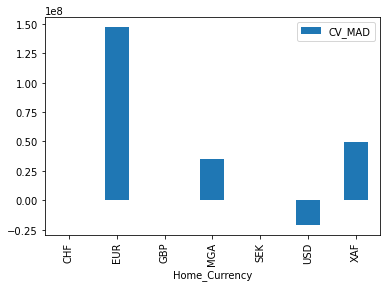

In [11]:
resultat_par_devise.plot.bar()

In [12]:
resultat_par_devise = resultat_par_devise.drop(["SEK", "GBP", "CHF"])

<AxesSubplot:xlabel='Home_Currency'>

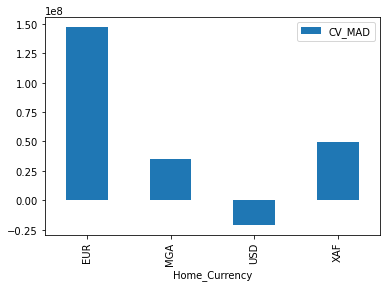

In [13]:
resultat_par_devise.plot.bar()

In [17]:
resultat_par_devise.loc["EUR"] = resultat_par_devise.loc["EUR"] + resultat_par_devise.loc["XAF"]

In [21]:
resultat_par_devise = resultat_par_devise.drop("XAF")

<AxesSubplot:xlabel='Home_Currency'>

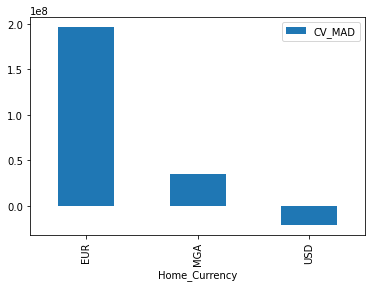

In [22]:
resultat_par_devise.plot.bar()

In [39]:
S_O = [EURMAD.loc["2019-03-01"].values[0], MGAMAD.loc["2019-03-01"].values[0], USDMAD.loc["2019-03-01"].values[0]]

In [47]:
S0 = pd.Series(index=["EUR", "MGA", "USD"], data=S_O)

In [53]:
for i in list(S0.index):
    resultat_par_devise.loc[i] = resultat_par_devise.loc[i]/S0.loc[i]

In [79]:
float(resultat_par_devise.loc["MGA"])*mga.values


array([[34790757.32      ],
       [34585500.41982255],
       [34506612.41918833],
       ...,
       [30469523.13604411],
       [30469523.13604411],
       [30585001.68689968]])

In [57]:
eur = EURMAD.loc["2019-03-01":]
mga = MGAMAD.loc["2019-03-01":]
usd = USDMAD.loc["2019-03-01":]

In [92]:
d

array([[2.31220580e+08],
       [2.31302389e+08],
       [2.31189959e+08],
       ...,
       [2.22948691e+08],
       [2.22948691e+08],
       [2.24246654e+08]])

<AxesSubplot:xlabel='Date'>

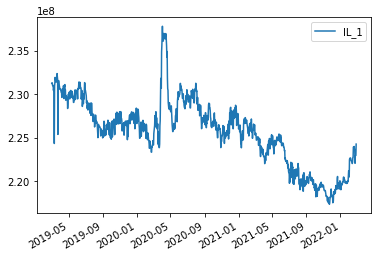

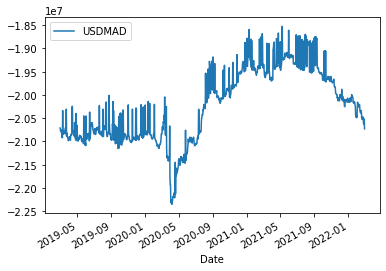

In [98]:
d  = (float(resultat_par_devise.loc["EUR"])*eur.values + float(resultat_par_devise.loc["MGA"])*mga.values)
flat_list = [item for sublist in d for item in sublist]
IL_1 = pd.Series(index = list(eur.index), data = flat_list )
IL_2 = float(resultat_par_devise.loc["USD"])*usd
IL_1.plot(label = "IL_1", legend = True)

IL_2.plot(label = "IL_2", legend = True)

In [99]:
IL = IL_1.values + IL_2.values

In [104]:
IL_1.values

array([2.31220580e+08, 2.31302389e+08, 2.31189959e+08, ...,
       2.22948691e+08, 2.22948691e+08, 2.24246654e+08])

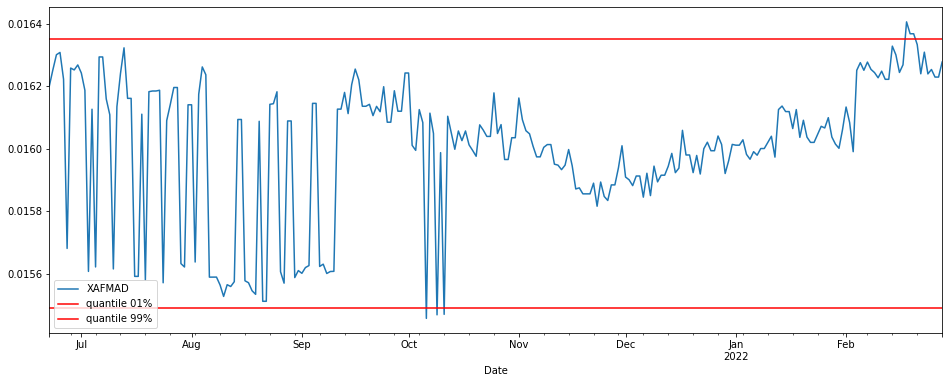

In [45]:
XAFMAD.iloc[-252:].plot(figsize=(16,6))
plt.axhline(np.quantile(XAFMAD_ar[-252:], 0.01), color='r', label="quantile 01%", linestyle='-')
plt.axhline(np.quantile(XAFMAD_ar[-252:], 0.99), color='r', label="quantile 99%", linestyle='-')
plt.legend()

In [15]:
chocs = pd.DataFrame(index=resultat_par_devise.index, columns=resultat_par_devise.columns)

In [16]:
arrays = {"EUR":EURMAD_ar, "MGA":MGAMAD_ar, "USD":USDMAD_ar, "XAF":XAFMAD_ar}
dfs = {"EUR":EURMAD, "MGA":MGAMAD, "USD":USDMAD, "XAF":XAFMAD}
tickers = list(arrays.keys())

In [17]:
coef_var = pd.DataFrame(index=np.unique(np.array([day.year for day in XAFMAD.index])), columns=resultat_par_devise.index)

In [18]:
for ticker in coef_var.columns:
    r = [day.year for day in dfs[ticker].index]
    grp = dfs[ticker].groupby(r)
    coef_var[ticker] = (grp.std()/grp.mean())

In [19]:
coef_var

Home_Currency,EUR,MGA,USD,XAF
2003,0.004050,NaN,0.012753,0.004891
2004,0.008221,NaN,0.027992,0.008392
2005,0.011984,0.037554,0.032128,0.023972
2006,0.015280,0.023337,0.034062,0.021694
2007,0.013272,0.021371,0.031989,0.011674
2008,0.012970,0.048323,0.060879,0.014698
2009,0.009816,0.050035,0.044390,0.011882
2010,0.010235,0.036905,0.037439,0.010798
2011,0.012242,0.019921,0.030129,0.012410
2012,0.013155,0.028810,0.023224,0.015696


In [20]:
chocs = pd.DataFrame(index=resultat_par_devise.index, columns=["Quantile_99", "Quantile_01"])

In [21]:
for ticker in arrays.keys():
    chocs.loc[ticker, "Quantile_99"] = np.quantile(arrays[ticker][-252:], 0.99)
    chocs.loc[ticker, "Quantile_01"] = np.quantile(arrays[ticker][-252:], 0.01)

In [22]:
PX_LAST = EURMAD
for ticker in tickers[1:]:
    PX_LAST = pd.merge(PX_LAST, dfs[ticker], on='Date',how='outer')
PX_LAST = PX_LAST.sort_index()
PX_LAST = PX_LAST.ffill().bfill()

In [23]:
last_date = PX_LAST.tail(1).index[0]
for ticker in tickers:
    if resultat_par_devise.loc[ticker, "CV_MAD"] >0:
        chocs.loc[ticker,"diff_with_today"] = (PX_LAST.loc[last_date, ticker+"MAD"] - chocs.loc[ticker,"Quantile_01"])
        chocs.loc[ticker,"Choc_based_on_quantile"] = (PX_LAST.loc[last_date, ticker+"MAD"] - chocs.loc[ticker,"Quantile_01"])*resultat_par_devise.loc[ticker, "CV_MAD"]
    else:
        chocs.loc[ticker,"diff_with_today"] = (PX_LAST.loc[last_date, ticker+"MAD"] - chocs.loc[ticker,"Quantile_99"])
        chocs.loc[ticker,"Choc_based_on_quantile"] = -(PX_LAST.loc[last_date, ticker+"MAD"] - chocs.loc[ticker,"Quantile_99"])*resultat_par_devise.loc[ticker, "CV_MAD"]

In [24]:
chocs

,Quantile_99,Quantile_01,diff_with_today,Choc_based_on_quantile
Home_Currency,,,,
EUR,10.7048,10.3949,0.316029,4.647880e+07
MGA,0.00240609,0.00222814,0.000167,5.826297e+03
USD,9.46224,8.6253,0.084260,1.745096e+06
XAF,0.0163497,0.015492,0.000785,3.875068e+04


In [25]:
chocs["volatility"] = PX_LAST.iloc[-252:, :].std().values

In [26]:
for ticker in tickers:
    if resultat_par_devise.loc[ticker, "CV_MAD"] >0:
        chocs.loc[ticker,"Choc_based_on_vol"] = (chocs.loc[ticker,"volatility"])*resultat_par_devise.loc[ticker, "CV_MAD"]
    else:
        chocs.loc[ticker,"Choc_based_on_vol"] = -(chocs.loc[ticker,"volatility"])*resultat_par_devise.loc[ticker, "CV_MAD"]

In [27]:
chocs

,Quantile_99,Quantile_01,diff_with_today,Choc_based_on_quantile,volatility,Choc_based_on_vol
Home_Currency,,,,,,
EUR,10.7048,10.3949,0.316029,4.647880e+07,0.067477,9.923943e+06
MGA,0.00240609,0.00222814,0.000167,5.826297e+03,0.000042,1.476907e+03
USD,9.46224,8.6253,0.084260,1.745096e+06,0.231723,4.799175e+06
XAF,0.0163497,0.015492,0.000785,3.875068e+04,0.000219,1.079855e+04


In [28]:
returns = PX_LAST/PX_LAST.shift(1)-1

In [29]:
chocs["min_variation"] = returns.iloc[-252:].min().values
chocs["max_variation"] = returns.iloc[-252:].max().values

In [30]:
for ticker in tickers:
    if resultat_par_devise.loc[ticker, "CV_MAD"] >0:
        chocs.loc[ticker,"Choc_based_on_variation"] = -(PX_LAST.loc[last_date, ticker+"MAD"]*(chocs.loc[ticker,"min_variation"])*resultat_par_devise.loc[ticker, "CV_MAD"])
    else:
        chocs.loc[ticker,"Choc_based_on_variation"] = -(PX_LAST.loc[last_date, ticker+"MAD"]*chocs.loc[ticker,"max_variation"])*resultat_par_devise.loc[ticker, "CV_MAD"]

In [31]:
chocs

,Quantile_99,Quantile_01,diff_with_today,Choc_based_on_quantile,volatility,Choc_based_on_vol,min_variation,max_variation,Choc_based_on_variation
Home_Currency,,,,,,,,,
EUR,10.7048,10.3949,0.316029,4.647880e+07,0.067477,9.923943e+06,-0.008058,0.010154,1.269282e+07
MGA,0.00240609,0.00222814,0.000167,5.826297e+03,0.000042,1.476907e+03,-0.057581,0.057197,4.799078e+03
USD,9.46224,8.6253,0.084260,1.745096e+06,0.231723,4.799175e+06,-0.034550,0.036852,7.286212e+06
XAF,0.0163497,0.015492,0.000785,3.875068e+04,0.000219,1.079855e+04,-0.039834,0.042955,3.200288e+04
